import library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/Project/MYSQl/Zomato_data/Zomato data .csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

convert the data type of the "rate" to float and remove the denominator

In [5]:
def rate(value):
    value=str(value).split("/")
    value=value[1]
    return float(value)

data['raise']=data['rate'].apply(rate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),raise
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet,5.0
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet,5.0
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet,5.0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet,5.0
4,Grand Village,No,No,3.8/5,166,600,Buffet,5.0


Text(0.5, 0, 'Type of restaurant')

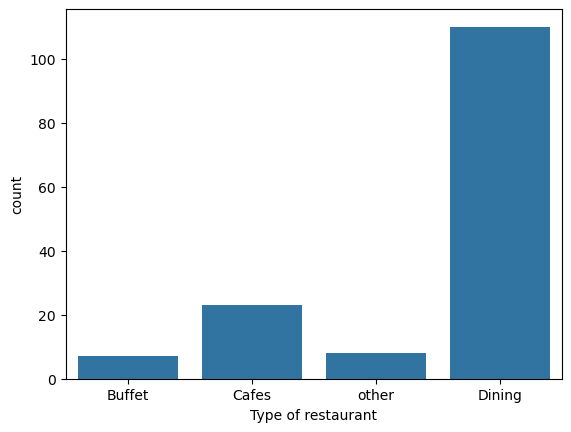

In [13]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Type of restaurant')

conclusion: The majority of the restaurants fall into the dining category

Dinning restaurants are preferred by  a larger number of individuals.

In [15]:
group_data =data.groupy('listed_int(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result,c=['grren', marker="o"])
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

SyntaxError: unterminated string literal (detected at line 3) (528284163.py, line 3)

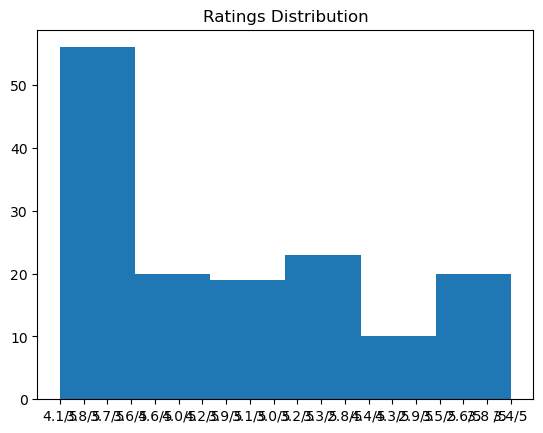

In [8]:
plt.hist(data['rate'],bins=6)
plt.title('Ratings Distribution')
plt.show()

The majority of restaurants received ratings rating from 3.5 t0 4.

The majority of couples prefer restaurants an approzimate cost of 300 rupees.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

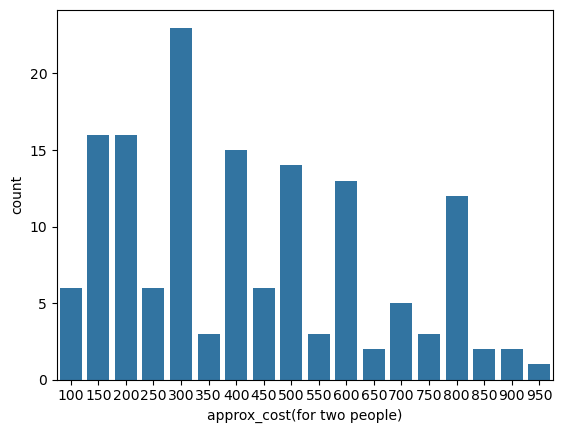

In [23]:
sns.countplot(x=data['approx_cost(for two people)'])

online orders receive higher rating then offline orders.

In [ ]:
sns.boxplot(x='online-Order', y='rate', data=data)

In [ ]:
pvit = data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pvit,annot=True, cmap='YlGnBu', fnt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

conclusion:   
Dinning restaurants primarily accept  offline orders, wheareas cafes primarily receive online orders. This suggests that clients prefers orders in person at restaurants, but prefer online ordering at cafes.